# Introduction to Bayesian Network

## Nikolai Chow

### What is Bayesian Network?

A Bayesian network is a directed acyclic graph(DAG) in which each edge corresponds to a direct effect, and each node corresponds to a unique random variable. 



### Non DAG vs DAG
<img src="DAG.png" width=700 height=700 />

In [ ]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt

G_p_1 = nx.DiGraph()
edge_list_1 = [ ('W', 'Z'), ('X', 'Z'), ('Z', 'X'), ('Z', 'X'), ('X', 'Y')]
for e in edge_list_1: 
    u, v = e
    G_p_1.add_edge(u, v)

G_p_2 = nx.DiGraph()
edge_list_2 = [ ('Z', 'W'), ('Z', 'X'), ('Z', 'Y'), ('Y', 'X')]
for e in edge_list_2: 
    u, v = e
    G_p_2.add_edge(u, v)



In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.flatten()
nx.draw_spring(G_p_1, ax=ax[0], node_size=500, with_labels=True, font_weight='bold', arrows=True, alpha=0.8, connectionstyle='arc3,rad=0.25', arrowsize=20)
ax[0].set_title('Non DAG')
nx.draw_spring(G_p_2, ax=ax[1], node_size=500, with_labels=True, font_weight='bold', arrows=True, alpha=0.8, connectionstyle='arc3,rad=0.25', arrowsize=20)
ax[1].set_title('DAG')
plt.subplots_adjust(wspace=0.8)
plt.savefig('DAG.png')
plt.show()
plt.close()

### Conditional independent

X and Y is said to be conditionally independent given Z if

$P(x|y,z) = P(x|z)$

In [1]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt

G_p = nx.DiGraph()
edge_list = [ ('Season', 'Rain'), ('Season', 'Sprinkler'), ('Rain', 'Wet'), ('Sprinkler', 'Wet'), ('Wet', 'Slippery')]
for e in edge_list: 
    u, v = e
    G_p.add_edge(u, v)

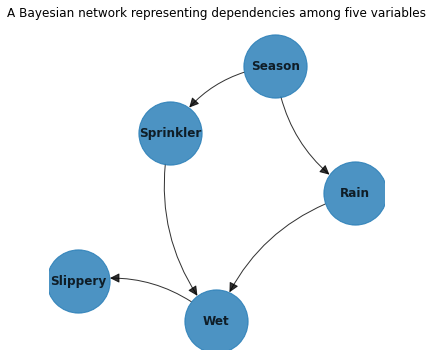

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw_spring(G_p, ax=ax, node_size=4000, with_labels=True, font_weight='bold', arrows=True, alpha=0.8, connectionstyle='arc3,rad=0.25', arrowsize=20)
ax.set_title('A Bayesian network representing dependencies among five variables')
plt.savefig('BNR.png')
plt.show()
plt.close()

### The chain rule of probability calculus 
Let $V = \{X_1,…, X_n\}$ be a set of variables, and let $P(v)$ be the joint probability distribution on these variables. We have

$P(x_1,..,x_n) = \prod_j P(x_j | x_1, ... , x_{j-1})$

### Definition (Markovian Parents) 

A set of variables $PA_j$ is said to be Markovian parents of $X_j$ if $PA_j$ is a minimal set of predecessors of $X_j$ that renders $X_j$ independent of all its other predecessors. In other words, $PA_j$ is any subset of $\{X_1,…, X_{j-1}\}$ satisfying

$P(x_j | pa_j) = P(x_j | x_1, ... , x_{j-1})$

and such that no proper subset of $PA_j$ satisfies the above

It can be represented in the form of a DAG in which variables are represented by nodes and arrows are drawn from each node of the parent set $PA_j$ toward the child node $X_j$. 

### The original use of Bayesian Network

Assume that we have n random variables. To store $P(x_1,…, x_n)$ explicitly would require a table with $2^n$ entries, an unthinkably large number by any standard. 

$P(x_1,...,x_n)=\prod_iP(x_i|ax_i)$

Substantial economy can be achieved when each variable depends on just a small subset of other variables. Such dependence information permits us to decompose large distribution functions into several small distributions

### Something we can do with Bayesian Network

According to Judea Pearl (Turing Award, 2012):

1. Testing causal assumptions
2. Discovering causal relationships
3. Drawing inferences from incomplete Data
4. Classifying direct and indirect effect
5. And more

### Why the old method is not good enough? 

#### Simpson's Paradox

The paradox refers to the existence of data in which a statistical association that holds for an entire population is reversed in every subpopulation.



A group of sick patients are given the option to try a new drug. Among those who took the drug, a lower percentage recover than among those who did not. However, when we partition by gender, we see that more men taking the drug recover than do men not taking the drug, and more women taking the drug recover than do women not taking the drug! 

### Simpson's Paradox
<img src="DG.png" width=1000 height=1000 />
Source: Glymour et al. (2016)

### Simpson's Paradox
<img src="Spar.jpg" width=1000 height=1000 />
Source: Glymour et al. (2016)

Segregated data does not always give correct answer. Controlling other factor may not helpful.

### Simpson's Paradox
<img src="BP.png" width=1000 height=1000 />
Source: Glymour et al. (2016)

### Meaningful compact representation for causcal assumptions


**Task**: Represent causcal knowledge in compact, transparent, and testable way.

**Result**: Graphical models


* Graphs map scientific knowledge
* Graphical criteria tell us, for any pattern of paths, what pattern of dependencies hold in the data.


### Definition (Markov Compatibility) 

If a probability function P admits the factorization of 

$P(x_1,...,x_n)=\prod_iP(x_i|ax_i)$

relative to DAG G, we say that G represents P, that G and P are compatible.

#### Definition (d-Separation) 

A path p is said to be d-separated (or blocked) by a set of nodes Z if and only if
1. p contains a chain i $\rightarrow$ m $\rightarrow$ j or a fork i $\leftarrow$ m $\rightarrow$ j such that the middle node m is in Z, or
2. p contains an inverted fork (or collider) i $\rightarrow$ m $\leftarrow$ j such that the middle node
m is not in Z and such that no descendant of m is in Z.




$X=\{Rain\}$ and $Y=\{Sprinkler\}$ are d-seperated by $Z=\{Season\}$, but not d-seperated by $Z'=\{Season,Slippery\}$.
<img src="BNR.png" width=600 height=500 />

#### Theorem (Probabilistic Implications of d-Separation):

If sets X and Y are d-separated by Z in a DAG G, then X is independent of Y conditional on Z in every distribution compatible with G. 

$X=\{Rain\}$ and $Y=\{Sprinkler\}$ are d-seperated by $Z=\{Season\}$, but not d-seperated by $Z'=\{Season,Slippery\}$.
<img src="BNR.png" width=600 height=500 />

For example, if the admission criteria to a certain graduate school call for either high grades as an undergraduate or special musical talents, then these two attributes will be found to be correlated (negatively) in the student population of that school, even if these attributes are uncorrelated in the population at large.

The converse part of is in fact much stronger – the absence of d-separation implies dependence in almost all distributions compatible with G.

### Causal Discovery

Task: Search for a set of models (graphs) that are compatible with the data, and represent them compactly.

Results: In certain circumstances, and under weak assumptions, causal queries can be estimated directly from the compatibility set.

### The PC Algorithm

Start with complete undirected graph
1. Identifying the skeleton
2. Identifying the immoralities and orient qualifying edges that are incident on colliders


#### Identifying the skeleton

Start with complete undirected graph and remove edges between $X$ and $Y$ when $P(X|Y,Z)=P(X|Z)$



<img src="PCalgo2.png" width=600 height=500 />
Source: Kalisch and Bühlman (2007)

### All problems solved?

Equivalence class of DAGs

### Where is it going in economics

Chernozhukov, V., Kasahara, H., & Schrimpf, P. (2021). Causal impact of masks, policies, behavior on early covid-19 pandemic in the US. Journal of econometrics, 220(1), 23-62.

Tsagris, M. (2021). A new scalable Bayesian network learning algorithm with applications to economics. Computational Economics, 57(1), 341-367.

Spiegler, R. (2016). Bayesian networks and boundedly rational expectations. The Quarterly Journal of Economics, 131(3), 1243-1290.

### What if?


## Reference

Glymour, M., Pearl, J., & Jewell, N. P. (2016). Causal inference in statistics: A primer. John Wiley & Sons.

Koller, D., & Friedman, N. (2009). Probabilistic graphical models: principles and techniques. MIT press.

Kalisch, M., & Bühlman, P. (2007). Estimating high-dimensional directed acyclic graphs with the PC-algorithm. Journal of Machine Learning Research, 8(3).

Pearl, J. (2009). Causality. Cambridge university press.